# Homework set 5

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 4, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0


Guoda Paulauskaite 12255076 & Chayenne Olumuyiwa 12055662

# Exercise 1 (6 points)

A bacterial population $P$ grows according to the geometric progression

$$P_t = rP_{t-1}$$

Where r is the growth rate. The following population counts $P_1 ,\ldots, P_8$ (in billions) are observed:

In [72]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

data = np.array( [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14] )

# (a)
Read chapter 6.6 on Nonlinear Least squares. Use the Gauss-Newton Method to fit the model function $f(t, x_1, x_2) = x_1\!\cdot x_2^t$ to the data. Find estimates for the initial population $P_0=x_1$ and the growth rate $r=x_2$. Implement the Gauss-Newton method yourself. You may use linear algebra functions from `scipy` and `numpy`. Plot the datapoints and the curve fitted to the data in a semilogarithmic plot.

It is best if you define your function for Gauss-Newton separately from the definitions associated with the bacterial model.

In [34]:
def Jacobian(x1, x2):
    '''Computes the Jacobian matrix for f = x1*x2^t for 8 data points.'''
    
    #preallocate array
    J = np.zeros((8, 2))
    
    for t in range(0, 8):
        J[t, 0] = -(x2**t)
        J[t, 1] = -t*x1*(x2**(t-1))
        
    return J

def Gauss_Newton(x_0, data, k):
    ''' 
    Uses the Gauss-Newton method to fit the model function f(t, x1, x2) = x1 * x2 ^ t to data starting from initial 
    value x_0. 
    
    Input: initial value x_0 (list), data points data (list), number of iterations k (int)
    Output: Result of Gauss-Newton method x (list)
    '''
    
    x = x_0
    n = len(data)
    
    for j in range (k):
        x1 = x[0]
        x2 = x[1]
        y_approx = []

        for t in range(8):
            y = x1 * x2**t
            y_approx.append(y)

        residual = data - np.array(y_approx)
        J = Jacobian(x1, x2)
        sk = np.linalg.lstsq(J, -residual,rcond=None)[0]
        
        x += sk
        
    return x

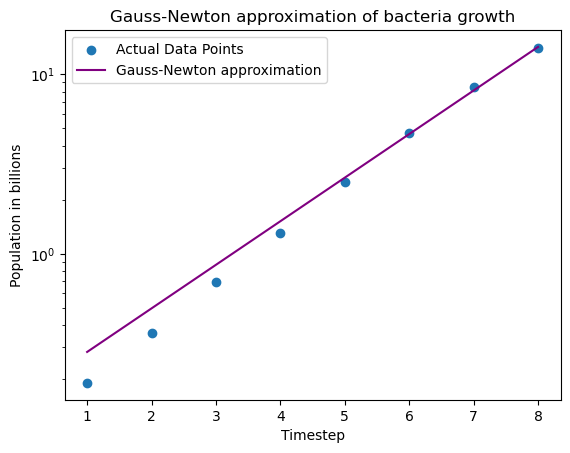

In [82]:
#Initialize data bacterial model and run Gauss-Newton iterations
k = 10
data = np.array( [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14])
P = 1
r = 1

x_0 = [P, r]
x = Gauss_Newton(x_0, data, k)


#Visualize results from the iteration
x1, x2 = x
final_y_GN = []

for t in range(8):
    y = x1 * (x2**t)
    final_y_GN.append(y)
    
plt.scatter(time_points, data, label='Actual Data Points')
plt.plot(time_points, final_y_GN, label='Gauss-Newton approximation', color = 'purple')
plt.xlabel('Timestep')
plt.ylabel('Population in billions')
plt.title('Gauss-Newton approximation of bacteria growth')
plt.legend()
plt.yscale('log')
plt.show()

# (b)
Let $f$ be a vector valued function $f = [ f_1, \ldots, f_m ]^T$. In weighted least squares one aims to minimize the objective function
$$
  \phi(x) = \frac{1}{2} \sum_{i=1}^m W_{ii} ( y_i - f_i(x)) ^2 , \qquad
  W_{ii} = \frac{1}{\sigma_i^2} , 
$$
where $\sigma_i$ is an estimate of the standard deviation in the data point $y_i$. This is equivalent to the standard least squares problem 
$$
\min_x \frac{1}{2} \| Y - F(x) \|_2^2
$$
with $F_i(x) = \frac{1}{\sigma_i} f(x)$  , $Y_i = \frac{1}{\sigma_i} y_i$. Assume that for each data point $y_i$ in the list above, the estimate for the standard deviation is given by
$$
  \sigma_i = 0.05 y_i .
$$ 
Perform a weighted least squares fit to obtain estimates for $P_0$ and $r$. 

Plot the datapoints and the curve fitted to the data again in a semilogarithmic plot.

Compare the residuals, i.e. the values of $y_i - f_i(x)$) obtained in (a) and (b), and discuss the differences between the results of the weighted and the unweighted optimization.


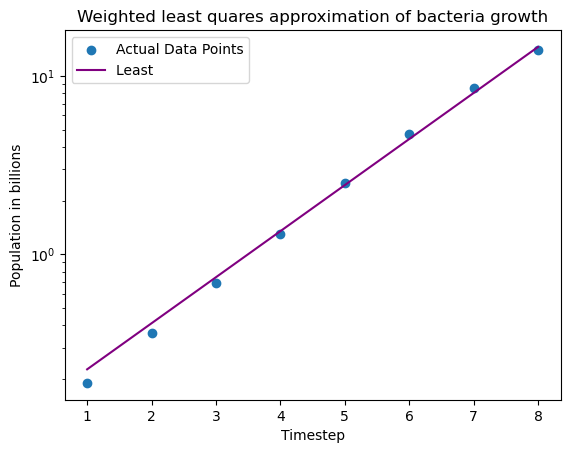

In [83]:
def ModelFunction(x1, x2, t):
    return x1*(x2**t)

def WeightedLeastSquares(y, n, x0):
    x1 = x0[0]
    x2 = x0[1]
    
    sigma_i = [yi*0.05 for yi in y]
    
    def PhiFunction(vars):
        x1, x2 = vars
        f = [ModelFunction(x1, x2, t) for t in range(0, n)]

        phi = 0
        for i in range(n):
            phi += (1/sigma_i[i])*(y[i] - f[i])**2

        phi = 0.5*phi
        return phi
    
    result = scipy.optimize.minimize(PhiFunction, [x1, x2])
    return result.x


data = np.array( [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14])
x_approx = WeightedLeastSquares(data, 8, [1, 1])

#Visualize results from the iteration
x1, x2 = x_approx
final_y_WS = []

for t in range(8):
    y = x1 * (x2**t)
    final_y_WS.append(y)

plt.scatter(time_points, data, label='Actual Data Points')
plt.plot(time_points, final_y_WS, label='Least ', color = 'purple')
plt.xlabel('Timestep')
plt.ylabel('Population in billions')
plt.title('Weighted least quares approximation of bacteria growth')
plt.legend()
plt.yscale('log')
plt.show()

In [90]:
difference_GN = sum(np.abs(data - final_y_GN))
difference_WS = sum(np.abs(data - final_y_WS))
print(f"The absolute sum of the residuals from the approximation derived through the unweighted Gauss-Newton method is {difference_GN}.")
print(f"The absolute sum of the residuals from the approximation derived through the weighted least squares method (using scipy.minimize) is {difference_WS}.")

The absolute sum of the residuals from the approximation derived through the unweighted Gauss-Newton method is 1.4061964887309202.
The absolute sum of the residuals from the approximation derived through the weighted least squares method (using scipy.minimize) is 1.5348885554118235.


From our above observations we can observe that the approximation derived through the Gauss-Newton method results in a slightly smaller error than that of the weighted least squares. 

# Exercise 2 (3 points)
A triangle has been measured. The measurements, a vector $x \in \mathbb{R}^6$, are as follows:
$$\begin{array}{c|c|c|c|c|c}
x_1 = \alpha 
& x_2 = \beta
& x_3 = \gamma
& x_4 = a
& x_5 = b
& x_6 = c \\ \hline
67.5^{\large\circ}
& 52^{\large\circ}
& 60^{\large\circ}
& 172 \text{m}
& 146 \text{m}
& 165 \text{m}
\end{array} .
$$
Here $\alpha, \beta, \gamma$ are the angles opposite the sides with length $a$, $b$, $c$, respectively.
The measurements $x$ have errors. We would like to correct them so that the new values $\tilde{x} = x + h$ are consistent quantities of a triangle. The have to satisfy:
$$ \tag{*}
\begin{array}{ccc}
\text{Sum of angles:} 
& \;\;\;\;\; & 
\tilde{x}_1 + \tilde{x}_2 + \tilde{x}_3 = 180^{\large\circ}
\\
\text{Sine theorem:}
&&
\tilde{x}_4 \sin(\tilde{x}_2) - \tilde{x}_5 \sin(\tilde{x}_1) = 0
\\
&&
\tilde{x}_5 \sin(\tilde{x}_3) - \tilde{x}_6 \sin(\tilde{x}_2) = 0 .
\end{array}$$


## (a)
Solve the constrained least squares problem $\min_x \| h \|_2^2$ subject to the constraints given by (*).

Use `scipy.optimize.minimize`.

Hint: Don't forget to work in radians!

Check that for the new values also e.g. the cosine theorem $c^2 = a^2 + b^2 - 2 ab \cos(\gamma)$ holds.

In [139]:
x0 = np.array([67.5*(np.pi/180), 52*(np.pi/180), 60*(np.pi/180), 172, 146, 165])

fun = lambda h: np.linalg.norm(h)**2

cons = ({'type': 'eq', 'fun': lambda h: x0[0] + h[0] + x0[1] + h[1] + x0[2] + h[2] - np.pi},
        {'type': 'eq', 'fun': lambda h: (x0[3] + h[3])*np.sin(x0[1] + h[1]) + (x0[4] + h[4])*np.sin(x0[0] + h[0]) },
        {'type': 'eq', 'fun': lambda h: (x0[4] + h[4])*np.sin(x0[2] + h[2]) + (x0[5] + h[5])*np.sin(x0[1] + h[1]) })

solution = scipy.optimize.minimize(fun, np.array([1,1,1,50,50,50]), constraints=cons)
h = solution.x

x_new = x0 + h

a = x_new[3]
b = x_new[4]
c = x_new[5]
gamma = x_new[2]

cosine_theorem_res = a**2 + b**2 - 2*a*b*np.cos(gamma) - c**2
print(f"result is {h}, cosine theorm res is {cosine_theorem_res}")

result is [-4.31968990e+00  8.51720675e+00 -4.18879020e+00 -4.32794296e-05
  1.69066102e-05 -5.71955799e-05], cosine theorm res is 73899.0021014257


## (b)
You will notice that the corrections will be made mainly to the angles and much less to the lengths of the sides of the triangle. This is because the measurements have not the same absolute errors. While the error in last digit of the sides is about 1, the errors in radians of the angles are about 0.01. Repeat your computation by taking in account with appropriate weighting the difference in measurement errors. Minimize not simply $\| h \|_2^2$ but
$$
  \left\| \begin{bmatrix} 100 h_1 \\ 100 h_2 \\ 100 h_3 \\ h_4 \\ h_5 \\ h_6 \end{bmatrix} \right\|_2^2.$$

In [138]:

fun = lambda h: np.linalg.norm([100*h[0], 100*h[1], 100*h[2], h[3], h[4], h[5]])**2
cons = ({'type': 'eq', 'fun': lambda h: x0[0] + h[0] + x0[1] + h[1] + x0[2] + h[2] - np.pi},
        {'type': 'eq', 'fun': lambda h: (x0[3] + h[3])*np.sin(x0[1] + h[1]) + (x0[4] + h[4])*np.sin(x0[0] + h[0]) },
        {'type': 'eq', 'fun': lambda h: (x0[4] + h[4])*np.sin(x0[2] + h[2]) + (x0[5] + h[5])*np.sin(x0[1] + h[1]) })

solution = scipy.optimize.minimize(fun, [0.79701416, -1.80266865, 1.01438114, 0.00722356, -0.0176632, 0.00854486], constraints=cons)
h = solution.x

print(x0 + h)

a = h[3]
b = h[4]
c = h[5]
gamma = h[2]

cosine_theorem_res = a**2 + b**2 - 2*a*b*np.cos(gamma) - c**2
print(f"result is {h}, cosine theorm res is {cosine_theorem_res}")

[  1.77207486  -0.26412142   1.63363922 179.73219467  47.88788483
 183.07333609]
result is [  0.59397762  -1.17169264   0.58644166   7.73219467 -98.11211517
  18.07333609], cosine theorm res is 10622.863945173773
